# Summary/Notes

### When you have finished your data visualization exploration, return to this markdown cell and fill it out in preparation for your meeting with the analytics manager, Victor.

**Hypothesis 1 findings:** To my suprise, customers that are younger than 30 are actually less likely to churn than those older than 30. 

**Hypothesis 2 findings:** Customer's with unlimited data are far more likely to churn than those without unlimited internet. After uncovering this finding I wanted to see if monthly cost plaid any role in this churn finding. I uncovered that, monthly cost for the group without unlimited internet does seem to be related to why they do not churn, but I was unable to find a relationship for those with unlimited. More research is required to thoroughly explore this topic.  

**Hypothesis 3 findings:** Customer tenure doesn't seem to play a huge role in churn. Churn is likely more related to the type of contract a customer enrolls in. Month-to-month contracts have the highest churn rate of any customer contract segment. And when you throw monthly cost into the mix there are signs that higher cost is what is turning customers away.

# How to Complete This Notebook

This notebook has a skeleton structure to guide your exploration and keep you on track. More details about each task can be found in the project sidebar. Be sure to read the sidebar instructions for each step before writing your code. 

# 1. IMPORT & EXPLORE THE DATA

## 1A. Import Packages & Set Style

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

## 1B. Import the Data
The datsets are stored in the following files:
* "customers.csv"
* "churn.csv"

These files are in the same folder you are currently working in. 

In [91]:
customers_df = pd.read_csv('customers.csv')
customers_df.head()

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,count_y,...,unlimited_data,contract,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure_in_days
0,8779QRDMV,1,Male,78,No,Yes,No,No,0,1,...,No,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,31
1,7495OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,244
2,1658BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Yes,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,519
3,4598XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,762
4,4846WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1127


In [51]:
churn_df = pd.read_csv('churn.csv')
churn_df.head()

,customer_id,churn_label
0,8779-QRDMV,Yes
1,7495-OOKFY,Yes
2,1658-BYGOY,Yes
3,4598-XLKNJ,Yes
4,4846-WHAFZ,Yes


## 1C. Explore Your Data & Identify Structure
Add as many code cells as you need to thoroughly explore both DataFrames here.

In [52]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  7042 non-null   object 
 1   count_x                      7042 non-null   int64  
 2   gender                       7042 non-null   object 
 3   age                          7042 non-null   int64  
 4   under_30                     7042 non-null   object 
 5   senior_citizen               7042 non-null   object 
 6   married                      7042 non-null   object 
 7   dependents                   7042 non-null   object 
 8   number_of_dependents         7042 non-null   int64  
 9   count_y                      7042 non-null   int64  
 10  quarter                      7042 non-null   object 
 11  number_of_referrals          7042 non-null   int64  
 12  customer_enrollment_date     7042 non-null   object 
 13  offer             

In [53]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  7043 non-null   object
 1   churn_label  7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


# 2. VISUALIZE THE CUSTOMER DATA

## 2A. Identify Columns Connected to Churn

In [60]:
numerical_cols = ["age", 
                  "number_of_referrals", 
                  "tenure_in_days",
                  "monthly_charge", 
                  "total_charges"]

In [61]:
customers_num_data = customers_df[numerical_cols]

In [62]:
categorical_cols = ["gender", 
                    "under_30", 
                    "senior_citizen", 
                    "married", 
                    "offer", 
                    "phone_service",
                    "internet_service",
                    "internet_type",
                    "unlimited_data",
                    "contract", 
                    "payment_method"]

In [63]:
customers_cat_data = customers_df[categorical_cols]

## 2B. Visualize the Data

### Plot 1:

<Figure size 432x288 with 0 Axes>

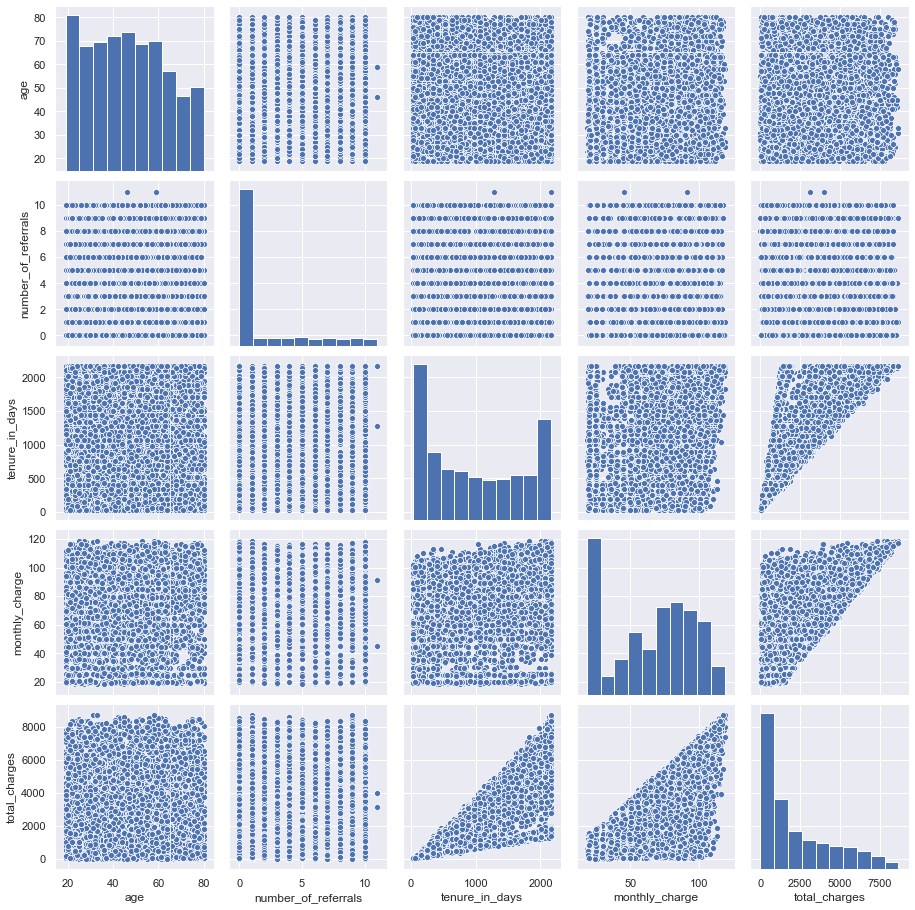

In [64]:
fig = plt.figure()
sns.pairplot(customers_num_data)

**Plot description:** This is a pair plot showing the relationships between the most important numerical columns. There are so many points in this dataset that it is difficult to make out patterns, but there is clearly a positive correlation between tenure and total charges. The relationship between monthly charge and total charges has an interesting shape, but I'm not sure if it would be considered a positive correlation. It looks like there is an upper limit on total charges that is related to monthly charges, but many total charges are less than this limit. 

Based on this plot, I suspect that "total_charges" refers to the total amount of money the customer has paid on this account over the lifetime of their having the account. This would explain the strong relationship between "total_charges" and "tenure_in_months" — the more months you have been with the company, the more you will have paid! 


### Plot 2:

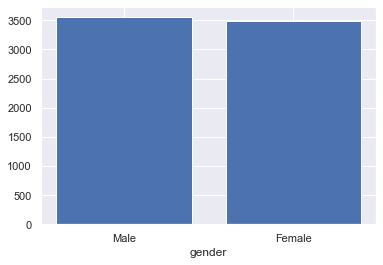

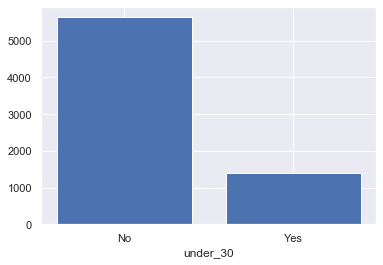

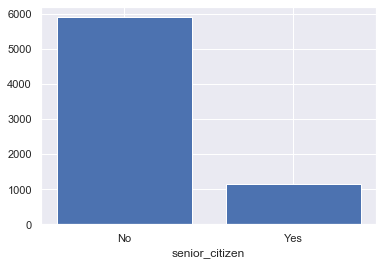

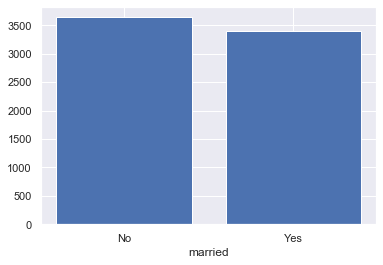

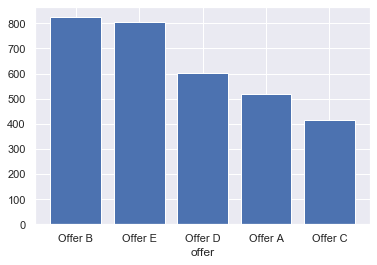

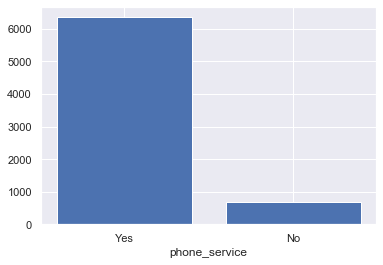

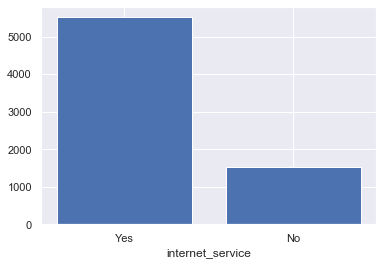

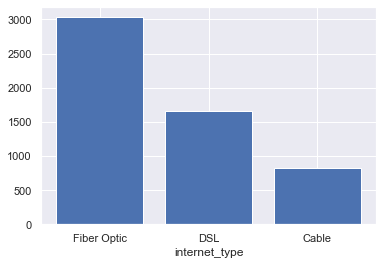

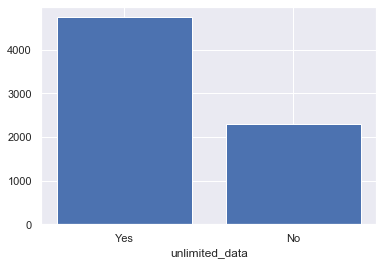

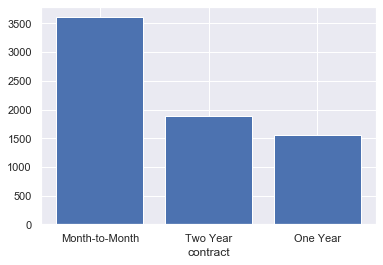

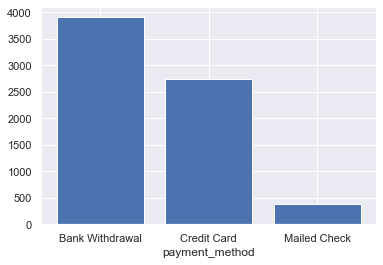

In [65]:
for col in categorical_cols:
    fig, ax = plt.subplots()
    s = customer_df[col].value_counts()
    ax.bar(s.index, s)
    ax.set_xlabel(col)

**Plot description:** In the cell above, I create bar charts for each of the categorical variables to compare the size of the groups within each category. This has shown me the following:
* there are roughly the same number of male and female customers
* under 30s and senior citizens both represent a relatively low proportion of users
* customers are slightly more likely to be unmarried
* most customers did not use an offer
* all but about 7- or 800 customers do not have phone service
* about 1500 customers do not have internet service
* the most common type of internet is fiber optic
* about 2/3 of customers have unlimited data
* the most common type of contract is month-to-month
* the most common payment type is bank withdrawl

### Plot 3:

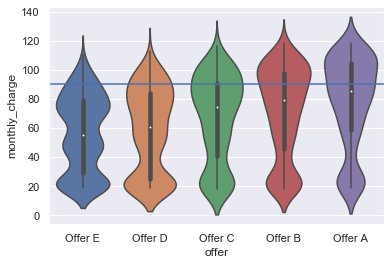

In [66]:
fig = plt.figure()
ax = sns.violinplot(data=customer_df, x="offer", y="monthly_charge")
ax.axhline(90)

**Plot description:** This plot is very interesting. Specifically, it is interesting because the trends shows that some customers who used offers appear to be paying more than customers who did not use an offer at all. I added a line at y=90, the approximate location of Q3 on the "No Offer" plot, and found that Q3 is higher for offer B and significantly higher for offer A. 

One possibility is that these offers were for specialized services such as streaming or unlimited data, making them more expensive than the average plan, as difference not offset by the offer. It would be interesting to investigate whether the is a relationship between offer use and specialized services. 

### Plot 4:

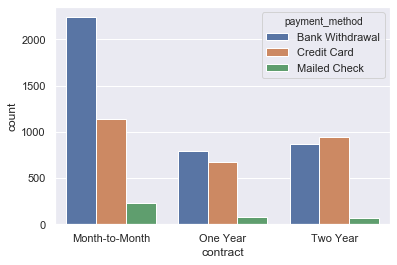

In [67]:
fig = plt.figure()
ax = sns.countplot(x="contract", hue="payment_method", data=customer_df)      

**Plot description:** This plot shows the breakdown of how customers pay based on the type of contract they have. Mailed checks are uncommon across all payment types. For one-year and two-year contract, bank withdrawal and credit card payment are about equally common, with bank withdrawl being slightly more popular for one-year contracts and credit card being slightly more popular for two-year contracts. Banks withdrawals are about twice as common for month-to-month customers than credit card payments are. 

It would be interesting to look into whether either of these factors, contract type or payment method, or a combination of the two, is related to churn. My hypothesis is that month-to-month customers are more likely to churn, since they not locked in to lengthy contracts.

### Plot 5:

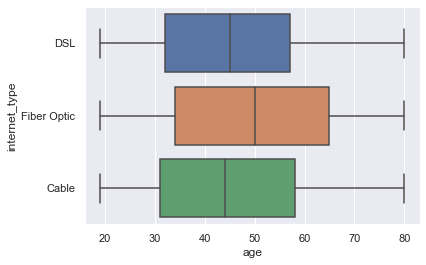

In [68]:
fig = plt.figure()
ax = sns.boxplot(x="age", y="internet_type", data=customer_df)

**Plot description:** This plot shows that every type of internet service has customers ranging in age from ~19 to 80. The distributions for DSL and cable internet appear to have similar distributions, while fiber optic seems to skew a little older. Half of all fiber optic customers are over 50. This seems surprising; I would have guessed that fiber optic service would skew younger. 

# 3. JOIN THE DATAFRAMES

In [69]:
churn_df["customer_id"].head()

0    8779-QRDMV
1    7495-OOKFY
2    1658-BYGOY
3    4598-XLKNJ
4    4846-WHAFZ
Name: customer_id, dtype: object

In [70]:
customer_df["customer_id"].head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [71]:
churn_df["customer_id"] = churn_df["customer_id"].str.replace('-', '')

In [72]:
churn_df["customer_id"].head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [82]:
joined_df = customers_df.merge(churn_df)

In [83]:
joined_df.head()

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,count_y,...,contract,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure_in_days,churn_label
0,8779QRDMV,1,Male,78,No,Yes,No,No,0,1,...,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,31,Yes
1,7495OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,244,Yes
2,1658BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,519,Yes
3,4598XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,762,Yes
4,4846WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1127,Yes


# 4. EXPLORE CHURN HYPOTHESES

### 1. Question: Do younger customers churn at a higher rate?
**Hypothesis:** Younger customers are always looking for new technology and better deals, while older customers might be less inclined to switch companies from what they are familiar with.

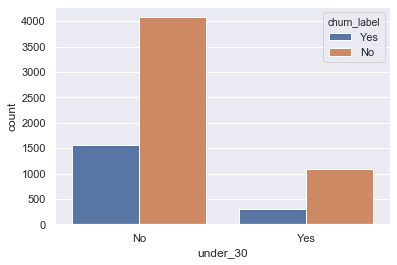

In [84]:
fig = plt.figure()
ax = sns.countplot(x="under_30", hue="churn_label", data=joined_df)

**Plot Description:** This plot divides customers into those who are under 30 years old and those who are 30 and older. It then divides each of these groups into whether or not they churned. Since the group of people under 30 is so much smaller than the groups of 30 and over, it's hard to tell which group has a worse churn rate. I did some quick math, though, and it looks like about 300 of the under-30 users churned out of a total of about 1400 (300 yes + 1100 no). This is about 21.4%. For users 30 and over, this looks like about 1500 out of 5600 (1500 yes + 4100 no), or about 26.7%. This seems to suggest that younger users are less likely to churn that other users, but these values are close enough together that it would probably be better to use the data to calculate the values directly. 

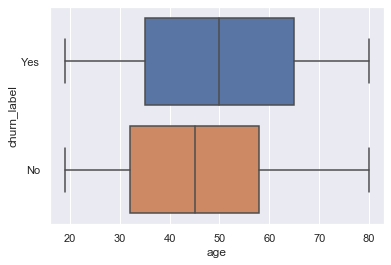

In [85]:
fig = plt.figure()
ax = sns.boxplot(x="age", y="churn_label", data=joined_df)

**Plot Description:** A pair of boxplots showing the distrbution of ages for customers who churned (blue) and customers who did not churn (orange). While the range for both boxplots is the same (~19 to 80) Q1, the median, and Q3 of the blue plot are all greater than the corresponding benchmarks on the orange plot. That means the age distribution of people who did not churn skews younger than the age distribution of people who did churn, further supporting the possibility that older customers tend to churn more than younger customers.   

### 2. Question: Do customers with an unlimited data plan churn at a lower rate?
**Hypothesis:** Customers who do not have unlimited data may become frustrated will low data speeds and seek out a different company. 

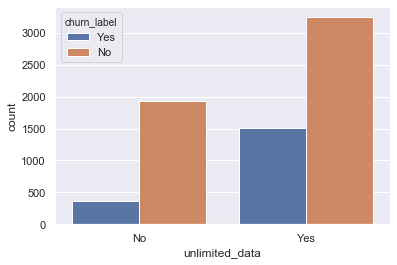

In [86]:
fig = plt.figure()
ax = sns.countplot(x="unlimited_data", hue="churn_label", data=joined_df)

**Plot Description:** Contrary to my hypothesis, it looks like customers without unlimited data actually churn at a much lower rate than those with unlimited data. It looks like about 350-400 of the 2298 customers without unlimited data churned -- that's about 15-17% of customers. In contrast, about 1500 of the 4745 customers who do have unlimited data churned -- more than 30%!

In [93]:
joined_df.head()

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,count_y,...,contract,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure_in_days,churn_label
0,8779QRDMV,1,Male,78,No,Yes,No,No,0,1,...,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,31,Yes
1,7495OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,244,Yes
2,1658BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,519,Yes
3,4598XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,762,Yes
4,4846WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1127,Yes


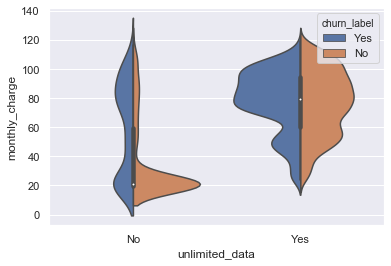

In [97]:
fig = plt.figure()
ax = sns.violinplot(x="unlimited_data", y="monthly_charge", hue="churn_label", split=True, data=joined_df)

**Plot Description:** This violin plot shows the distributions of monthly charges for those with unlimited data and those without. You can see that of those customers without unlimited data that have not churned, cost seems to play a major role.

In the violin plot of customers that do have unlimited data the churn distributions are very similar which likely means cost doesn't play as much of a factor in why the customers are leaving.

### 3. Question: Do customers with a longer customer tenure churn at a lower rate?
**Hypothesis:** The longer a customer has been with the company, the less likely they are to leave.

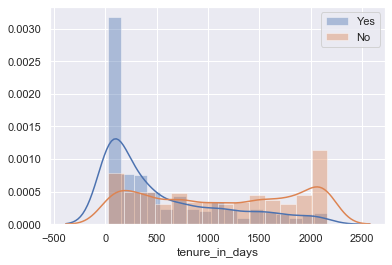

In [88]:
churned_yes_df = joined_df.loc[joined_df["churn_label"] == "Yes"]
churned_no_df = joined_df.loc[joined_df["churn_label"] == "No"]


fig = plt.figure()
sns.distplot(churned_yes_df["tenure_in_days"], label="Yes")
sns.distplot(churned_no_df["tenure_in_days"], label="No")
plt.legend()

**Plot Description:** These distributions are very interesting. There's a huge peak just past the zero-month mark for customers who churned, and a much smaller peak around 70 months for customers who did not churn. This plot supports the hypothesis that customers with longer tenure and less likely to churn. It's interesting just how many of the churned customers are in the group that has barely any customer tenure. Is it possible these people never even started their contract? Are they all month-to-month customers? 

The high-end peak for non-churners is also interesting. Why have so many customer been with the company for 70-ish months, and no one has been with the company longer? It's possible the company is only ~6 years (72 months) old. It's also possible that there is a cap on the "tenure_in_months" column for some reason, so any customers who have been with the company longer get grouped into the maximum number of months. 

To continue my analysis, I decided to look at contract type versus churn, to find out whether it's mostly month-to-month customers who are churning. 

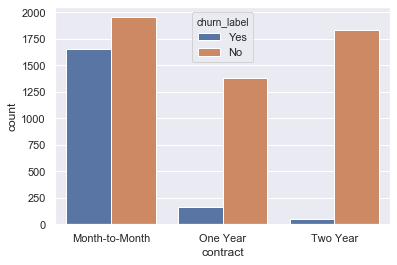

In [89]:
fig = plt.figure()
ax = sns.countplot(x="contract", hue="churn_label", data=joined_df)

**Plot Description:** This plot supports my hypothesis that customers on a month-to-month contract are most likely to churn. No, I'm curious what the distribution of monthly charges are for each of the different contract types. I will use a split violinplot to visualize this. 

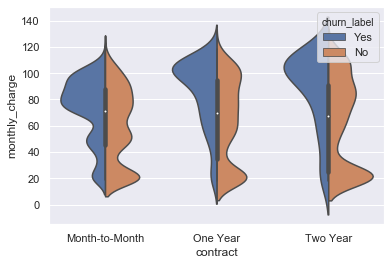

In [90]:
fig = plt.figure()
ax = sns.violinplot(x="contract", y="monthly_charge", hue="churn_label", split=True, data=joined_df)

**Plot description:** This plot shows that customers with low monthly charges are much more likely to not churn, and customers with higher monthly charger are much more likely to churn. This makes sense — people with a low bill will be less likely to conclude that they are paying too much and leave the company. Of course, customers with a low monthly charge aren't going to make the company much money, either! We need to figure out how to retain more of the high-paying customers. 
